In [2]:
# jupyter notebook에서 경고 메시지 숨기기
# jupyter notebook를 사용하다 보면 향후 버전이 올라갈 때 변경사항을 알려주는 경고 메시가 출력되는데 매우 거슬린다.
# 이럴 때 
import warnings
warnings.filterwarnings('ignore')    # 경고 메시지를 무시하고 숨긴다.
# warnings.filterwarnings('default') # 경고 메시지를 다시 표시한다.

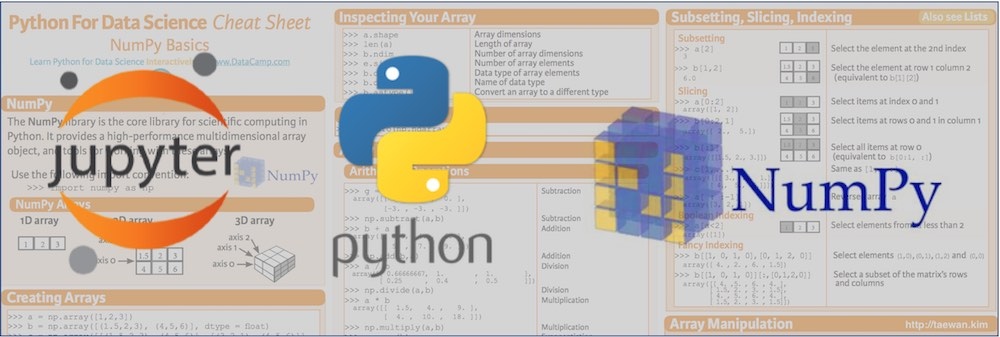

In [3]:
from IPython.display import Image
Image('./numpyImage/numpyImage00.jpg', width='1000')

파이썬 기반 데이터 분석 환경에서 numpy는 행렬 연산을 위한 핵심 라이브러리이다.  
numpy는 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공하고 특히 메모리 버퍼에 배열 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공한다.  
파이썬 list 객체를 개선한 numpy의 ndarray 객체를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있다.
***
numpy의 특징  
&nbsp;&nbsp;1. 강력한 n차원 배열 객체  
&nbsp;&nbsp;2. 정교한 브로드캐스팅(다대일 연산) 가능  
&nbsp;&nbsp;3. c/c++ 및 fortran 코드 통함 도구  
&nbsp;&nbsp;4. 유연한 선형 대수학, 푸리에 변환 및 난수 기능  
&nbsp;&nbsp;5. 범용적 데이터 처리에 사용 가능한 다차원 컨테이터

In [4]:
# jupyter notebook에서 command 창으로 나가지 않고 외부 라이브러리를 설치할 수 있다. => pip 앞에 '!'를 붙여서 실행하면 된다.
# !pip install numpy
import numpy as np
print(np.__version__) # __version__: 라이브러리의 버전을 얻어온다.

1.19.5


numpy 데이터 타입

In [5]:
# numpy는 다음과 같은 데이터 타입을 지원하고 배열을 생성할 때 dtype 속성으로 아래와 같은 데이터 타입을 지정할 수 있다.
# np.int64: 64비트 정수(고정 소수점) 타입
# np.float32: 32비트 실수(부동 소수점, 유동 소수점) 타입
# np.complex128: 복소수(128비트 float) 타입
# np.bool: 불린(논리값, True, False) 타입
# np.object: 객체 타입
# np.string: 문자열 타입
# np.unicode: 유니코드 타입

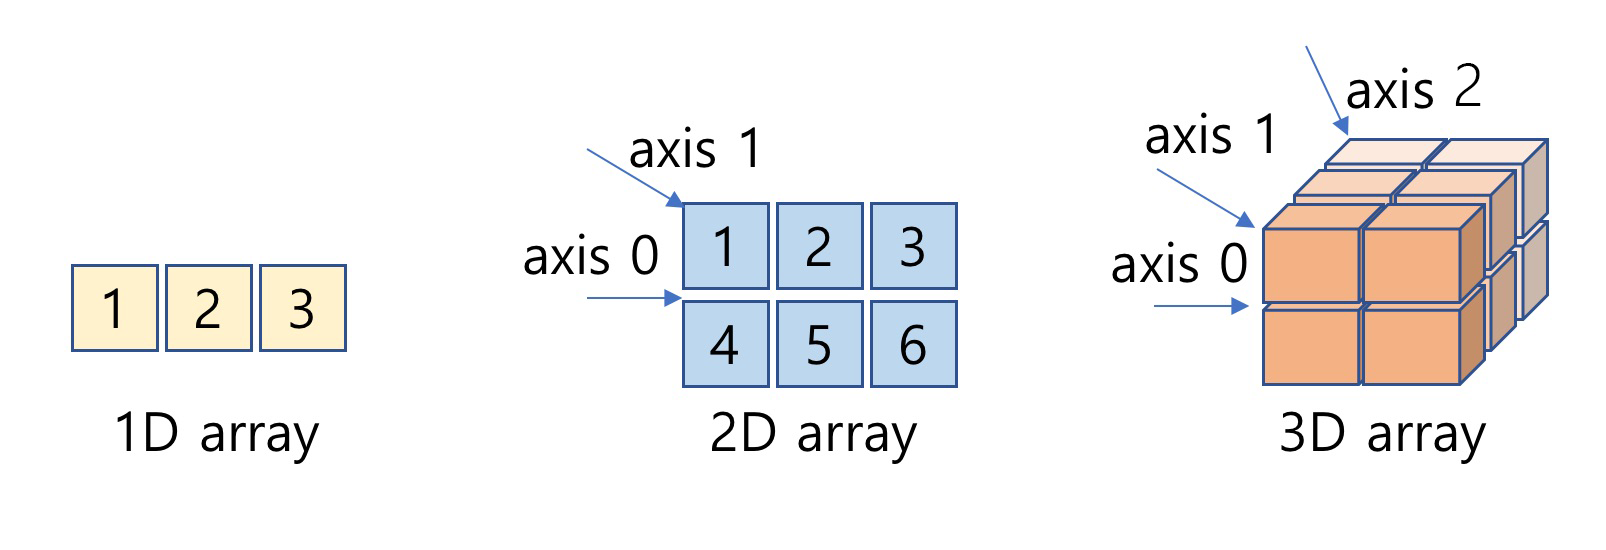

In [6]:
# numpy는 다차원 배열을 지원하고 numpy 배열의 구조는 shape으로 표현한다.
# shape은 배열 구조를 튜플 자료형을 사용해서 정의한다.
# 예를 들면 28 * 28 컬러 사진은 폭이 28, 높이가 28, 각 픽셀은 3개의 채널(RGB)로 구성된 구조를 가진다. 따라서 컬러 사진의
# 데이터 구조는 shape(28, 28, 3)인 3차원 배열이 된다.
# 다차원 배열은 입체적인 구조를 가지며 데이터 차원은 여러 갈래의 데이터 방향(axis)을 가진다.
# 다차원 배열의 데이터 방향은 axis로 표현하고 면은 axis=0, 행은 axis=1, 열은 axis=2로 지정한다.
Image('./numpyImage/numpyImage01.png', width='800')

In [7]:
# numpy 배열 객체 정보 출력용으로 사용할 함수를 정의한다.
def pprint(arr):
    print('type: {}'.format(type(arr)))
    print('shape: {}, dimension: {}, dtype: {}'.format(arr.shape, arr.ndim, arr.dtype))
    print('numpy 배열에 저장된 데이터\n', arr)

파이썬 list 객체로 numpy 배열을 생성할 수 있다.  
인수로 list 객체와 데이터 타입(dtype)을 입력해 numpy 배열을 생성하고 dtype을 생략할 경우 입력되는 list 객체의 타입으로 설정된다.

In [8]:
# 파이썬 1차원 list로 numpy 배열 만들기
arr = [1, 2, 3]
print(type(arr))
# np.array() 함수는 인수로 list 객체를 넘겨받아 numpy 배열을 생성한다.
a = np.array(arr, dtype=np.int32)
pprint(a)

<class 'list'>
type: <class 'numpy.ndarray'>
shape: (3,), dimension: 1, dtype: int32
numpy 배열에 저장된 데이터
 [1 2 3]


In [9]:
# 파이썬 2차원 list로 numpy 배열 만들기
arr = [[1, 2, 3], [4, 5, 6]]
print(type(arr))
a = np.array(arr, dtype=np.float64)
pprint(a)

<class 'list'>
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[1. 2. 3.]
 [4. 5. 6.]]


In [10]:
# 파이썬 3차원 list로 numpy 배열 만들기
arr = [[[1, 2, 3], [4, 5, 6]], [[11, 22, 33], [44, 55, 66]]]
print(type(arr))
a = np.array(arr)
pprint(a)

<class 'list'>
type: <class 'numpy.ndarray'>
shape: (2, 2, 3), dimension: 3, dtype: int32
numpy 배열에 저장된 데이터
 [[[ 1  2  3]
  [ 4  5  6]]

 [[11 22 33]
  [44 55 66]]]


numpy는 원하는 shape으로 배열을 만들고 각 요소를 특정값으로 초기화하는 함수를 제공한다.

In [11]:
# np.zeros() 함수는 지정된 shape의 배열을 생성하고 모든 요소를 0으로 초기화시킨다.
# np.zeros(shape, dtype, order)
# order => 다차원 데이터를 행 우선 방식(c/c++, java, python), 열 우선 방식(fortran)으로 메모리에 저장할지 여부를 결정한다.
a = np.zeros(shape=(3, 4), dtype=np.int16, order='f')
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int16
numpy 배열에 저장된 데이터
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [12]:
# np.ones() 함수는 지정된 shape의 배열을 생성하고 모든 요소를 1로 초기화시킨다.
# np.ones(shape, dtype, order)
a = np.ones(shape=(3, 4), dtype=np.int64)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int64
numpy 배열에 저장된 데이터
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [13]:
# np.full() 함수는 지정된 shape의 배열을 생성하고 모든 요소를 특정값(fill_value)으로 초기화시킨다.
# np.full(shape, fill_value, dtype, order)
a = np.full(shape=(3, 4), fill_value=999)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[999 999 999 999]
 [999 999 999 999]
 [999 999 999 999]]


In [14]:
# np.eye() 함수는 shape이 (n, n)인 단위행렬(대각선 요소만 1이고 나머지는 0인 행렬)을 생성한다.
# np.eye(n)
a = np.eye(5)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (5, 5), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [15]:
# np.empty() 함수는 지정된 shape의 빈 배열을 만든다. => 초기화를 하지 않는다. => 쓰레기가 저장되어 있다.
# np.empty(shape, dtype, order)
a = np.empty(shape=(3, 4))
pprint(a)

type: <class 'numpy.ndarray'>
shape: (3, 4), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[5.e-324 5.e-324 5.e-324 5.e-324]
 [5.e-324 5.e-324 5.e-324 5.e-324]
 [5.e-324 5.e-324 5.e-324 5.e-324]]


In [16]:
# like 함수
# numpy는 인수로 지정된 배열과 shape이 같은 배열을 만드는 *_like() 함수를 제공한다.
# np.zeros_like(), np.ones_like, np.full_like, np.empty_like()
a = np.array([[1, 2, 3], [4, 5, 6]])
pprint(a)
b = np.zeros_like(a)
pprint(b)
c = np.ones_like(a)
pprint(c)
d = np.full_like(a, 777)
pprint(d)
e = np.empty_like(a)
pprint(e)

type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[1 2 3]
 [4 5 6]]
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[0 0 0]
 [0 0 0]]
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[1 1 1]
 [1 1 1]]
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[777 777 777]
 [777 777 777]]
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[0 0 0]
 [0 0 0]]


데이터 생성 함수

In [17]:
# numpy는 주어진 조건으로 데이터를 생성한 후 배열을 만드는 데이터 생성 함수를 제공한다.
# np.linspace(), np.arange(), np.logspace()
# !pip install matplotlib
import matplotlib.pyplot as plt

[0.   0.25 0.5  0.75 1.  ]


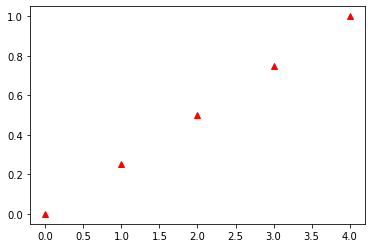

In [18]:
# np.linspace() 함수는 start 부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성해서 배열을 만든다.
# np.linspace(start, end, num)
# 요소의 개수를 기준으로 균등 간격 배열을 생성한다.
a = np.linspace(0, 1, 5)
print(a)
# np.linspace() 함수 실행 결과 시각화
plt.plot(a, 'r^')
plt.show()

[0 2 4 6 8]


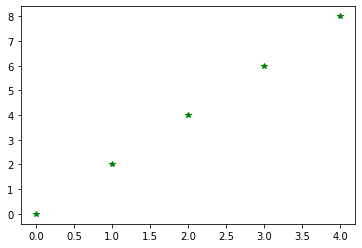

In [19]:
# np.arange() 함수는 start 부터 stop 미만까지 step 간격으로 데이터를 생성하고 배열을 만든다.
# np.arange([start, ]stop[, step], dtype)
# np.linspace() 함수는 요소의 개수로 배열을 만들었지만 np.arange() 함수는 데이터 간격을 기준으로 균긍한 간격의 배열을 생성한다.
# start를 생략하면 0, step을 생략하면 1이 기본값으로 사용된다.
# np.arange(10), np.arange(0, 10), np.arange(0, 10, 1)은 모두 같은 기능이 실행된다.
a = np.arange(0, 10, 2)
print(a)
plt.plot(a, 'g*')
plt.show()

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


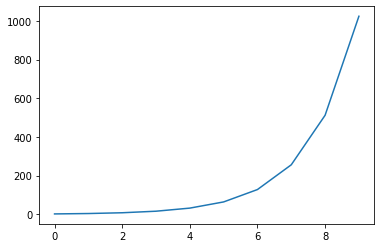

In [20]:
# np.logspace() 함수는 로그 스케일로 지정된 범위(start 부터 stop 사이)에서 num개 만큼 균등 간격으로 데이터를 생성하고 배열을
# 만든다.
# np.logspace(start, end, num, base)
a = np.logspace(1, 10, num=10, base=2)
print(a)
plt.plot(a)
plt.show()

난수 기반 배열 생성

In [21]:
# numpy는 난수 발생 및 배열을 생성하는 random 모듈을 제공하고 다음과 같은 함수를 사용할 수 있다.
# np.random.normal(), np.random.randn(), np.random.rand(), np.random.randint(), np.random.random()

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열에 저장된 데이터
 [-2.75111535  0.33356548 -1.27484788 -0.34720898 -0.31585457  1.91725796
 -0.12915721 -0.96672685 -0.16504639  0.14368373]


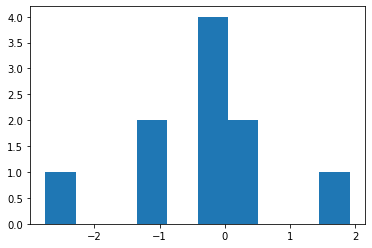

In [22]:
# np.random.normal() 함수는 정규 분포를 따르는 난수로 데이터를 생성하고 배열을 만든다.
# np.random.normal(loc, scale, size)
# loc => 정규 분포의 평균, scale => 표준편차, size => 배열의 크기, 난수의 개수
a = np.random.normal(0, 1, 10)
pprint(a)
plt.hist(a)
plt.show()

type: <class 'numpy.ndarray'>
shape: (10000,), dimension: 1, dtype: float64
numpy 배열에 저장된 데이터
 [5.16861453 5.4902816  5.73603019 ... 4.82051985 5.57701452 5.22155829]


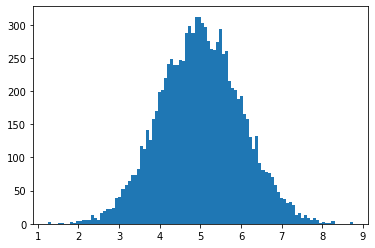

In [23]:
# np.random.normal() 함수가 생성한 난수는 정규 분포의 형상을 가진다.
a = np.random.normal(5, 1, 10000)
pprint(a)
# 정규 분포에서 10000개의 표본을 뽑은 결과를 100개의 구간(bins)으로 구분한 히스토그램으로 표현한다.
plt.hist(a, bins=100)
plt.show()

type: <class 'numpy.ndarray'>
shape: (10,), dimension: 1, dtype: float64
numpy 배열에 저장된 데이터
 [ 1.77083065 -1.11527381  0.03626769 -2.02691575 -2.46096316  0.1437435
 -0.66056488  0.45584995  1.97853847  1.54292317]


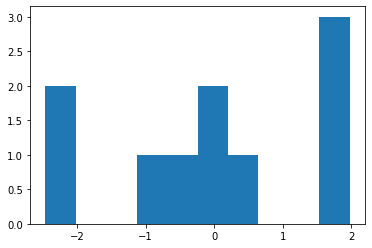

In [24]:
# np.random.randn() 함수는 표준 정규 분포(평균이 0이고 표준편차가 1인)를 따르는 난수로 데이터를 생성하고 배열을 만든다.
# np.random.randn(size)
a = np.random.randn(10)
pprint(a)
plt.hist(a)
plt.show()

type: <class 'numpy.ndarray'>
shape: (10000,), dimension: 1, dtype: float64
numpy 배열에 저장된 데이터
 [-0.03159756 -0.45989332 -0.1780199  ... -0.96905426  2.13099262
  1.35789973]


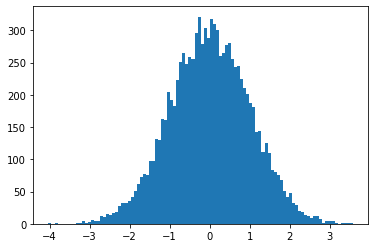

In [25]:
# np.random.randn() 함수가 생성한 난수는 정규 분포의 형상을 가진다.
a = np.random.randn(10000)
pprint(a)
# 정규 분포에서 10000개의 표본을 뽑은 결과를 100개의 구간(bins)으로 구분한 히스토그램으로 표현한다.
plt.hist(a, bins=100)
plt.show()

type: <class 'numpy.ndarray'>
shape: (3, 2), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[0.5055098  0.90823855]
 [0.51288653 0.25205065]
 [0.63649069 0.13726204]]


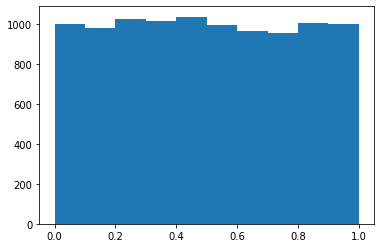

In [26]:
# np.random.rand() 함수는 0 ~ 1 사이의 균등 분포를 따르는 난수로 데이터를 생성하고 배열을 만든다.
# np.random.rand(size)
a = np.random.rand(3, 2)
pprint(a)

# np.random.rand() 함수가 생성한 난수는 균등 분포의 형상을 가진다.
b = np.random.rand(10000)
plt.hist(b, bins=10)
plt.show()

In [27]:
# np.random.randint() 함수는 지정된 크기만큼 low 부터 high 미만의 범위에서 정수로 난수 데이터를 생성하고 배열을 만든다.
# np.random.randint(low, high, size)
a = np.random.randint(1, 46, 6)
pprint(a)

type: <class 'numpy.ndarray'>
shape: (6,), dimension: 1, dtype: int32
numpy 배열에 저장된 데이터
 [ 1 39 12  9  3  5]


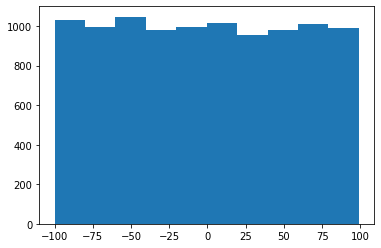

In [28]:
# -100에서 100의 범위에서 난수를 발생시킨다.
a = np.random.randint(-100, 100, 10000)
plt.hist(a, bins=10)
plt.show()

type: <class 'numpy.ndarray'>
shape: (2, 4), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[0.15827324 0.48290561 0.80879838 0.63837963]
 [0.88122736 0.15825068 0.75406498 0.10019667]]


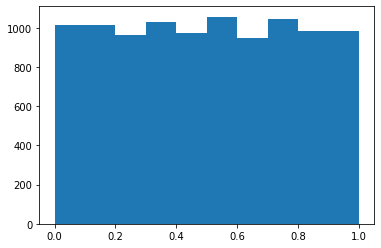

In [29]:
# np.random.random() 함수는 0 ~ 1 사이의 균등 분포에서 난수로 데이터를 생성하고 배열을 만든다.
# np.random.random(size)
a = np.random.random((2, 4))
pprint(a)

b = np.random.random(10000)
plt.hist(b, bins=10)
plt.show()

약속된 난수

In [30]:
# 무작위 수를 만드는 난수는 특정 시작 숫자로부터 난수처럼 보이는 수열을 만드는 알고리즘의 결과물이다.
# 따라서 시작점을 설정(고정)하면 난수 발생을 재연할 수 있다. => 매번 같은 난수가 발생되게 할 수 있다.
# np.random.seed() 함수로 seed 값을 지정하면 매번 같은 배열의 난수를 얻을 수 있다.
np.random.seed(1000)
pprint(np.random.randint(0, 10, (2, 3)))
pprint(np.random.random((2, 3)))

type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: int32
numpy 배열에 저장된 데이터
 [[3 7 7]
 [0 1 0]]
type: <class 'numpy.ndarray'>
shape: (2, 3), dimension: 2, dtype: float64
numpy 배열에 저장된 데이터
 [[0.21233268 0.04070962 0.39719446]
 [0.2331322  0.84174072 0.20708234]]


배열 상태 검사

In [31]:
# numpy는 배열의 상태를 검사하는 다음과 같은 방법을 제공한다.
# 배열 속성 검사 항목   배열 속성 확인 방법          예시                 결과
# 배열 shape            np.ndarray.shape 속성        arr.shape            (5, 2, 3)
# 배열 길이             일차원 배열 길이 확인        len(arr)             5
# 배열 차원             np.ndarray.ndim 속성         arr.ndim             3
# 배열 요소 수          np.ndarray.size 속성         arr.size             30
# 배열 타입             np.ndarray.dtype 속성        arr.dtype            dtype('float64')
# 배열 타입 명          np.ndarray.dtype.name 속성   arr.dtype.name       float64
# 배열 타입 변환        np.ndarray.astype 속성       arr.astype(np.int)   배열 타입 변환

In [32]:
arr = np.random.random((2, 3, 6))
pprint(arr)

type: <class 'numpy.ndarray'>
shape: (2, 3, 6), dimension: 3, dtype: float64
numpy 배열에 저장된 데이터
 [[[0.74246953 0.39215413 0.18225652 0.74353941 0.06958208 0.8853372 ]
  [0.9526444  0.93114343 0.41543095 0.02898166 0.98202748 0.33963768]
  [0.70668719 0.36187707 0.0351059  0.85505825 0.65725351 0.76568299]]

 [[0.55408724 0.88509294 0.90419762 0.0104217  0.07455674 0.24462921]
  [0.13330475 0.6979251  0.39820488 0.88312219 0.18100751 0.43249917]
  [0.0181432  0.69143786 0.46969065 0.12822219 0.89133705 0.91820362]]]


In [33]:
# numpy 배열 객체는 다음과 같은 방법으로 속성을 확인할 수 있다.
print('배열의 타입: {}'.format(type(arr)))
print('배열의 shape: {}'.format(arr.shape))
print('배열의 길이(면): {}'.format(len(arr)))
print('배열의 길이(행): {}'.format(len(arr[0])))
print('배열의 길이(열): {}'.format(len(arr[0][0])))
print('배열의 차원: {}'.format(arr.ndim))
print('배열을 구성하는 요소의 개수: {}'.format(arr.size))
print('배열에 저장된 데이터 타입: {}'.format(arr.dtype))
print('배열에 저장된 데이터 타입의 이름: {}'.format(arr.dtype.name))
# 배열의 요소를 정수(int)로 변환한다. => 배열 요소의 실제 값이 변환되는 것이 아니고 화면에 보여주기만 하는 것이다.
print(arr.astype(np.int32))
print(arr)
# 실제 데이터가 변경되게 하려면 정수로 변환한 결과를 배열에 다시 저장하면 된다.
arr = arr.astype(np.int32)
print(arr)

배열의 타입: <class 'numpy.ndarray'>
배열의 shape: (2, 3, 6)
배열의 길이(면): 2
배열의 길이(행): 3
배열의 길이(열): 6
배열의 차원: 3
배열을 구성하는 요소의 개수: 36
배열에 저장된 데이터 타입: float64
배열에 저장된 데이터 타입의 이름: float64
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]]
[[[0.74246953 0.39215413 0.18225652 0.74353941 0.06958208 0.8853372 ]
  [0.9526444  0.93114343 0.41543095 0.02898166 0.98202748 0.33963768]
  [0.70668719 0.36187707 0.0351059  0.85505825 0.65725351 0.76568299]]

 [[0.55408724 0.88509294 0.90419762 0.0104217  0.07455674 0.24462921]
  [0.13330475 0.6979251  0.39820488 0.88312219 0.18100751 0.43249917]
  [0.0181432  0.69143786 0.46969065 0.12822219 0.89133705 0.91820362]]]
[[[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]

 [[0 0 0 0 0 0]
  [0 0 0 0 0 0]
  [0 0 0 0 0 0]]]
